In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import warnings
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\KUMAR GAURAV\OneDrive\Desktop\LGM Internship\iris\iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Label Encoding 

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [7]:
df.Species.unique()
#Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

array([0, 1, 2])

In [8]:
report=sv.analyze(source=df)
report.show_html('Iris Report')

                                             |                                             | [  0%]   00:00 ->…

Report Iris Report was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Missing values

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

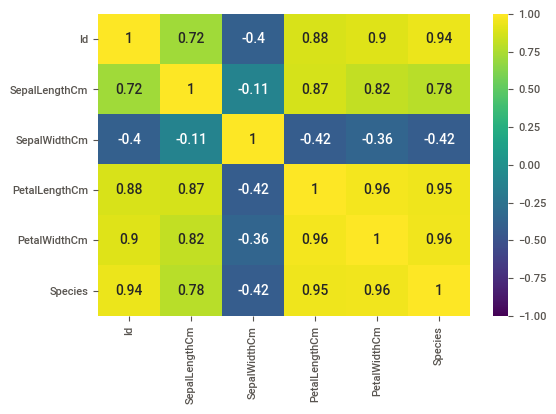

In [10]:
#correlation between features
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')

In [11]:
#Seperate Dependent and Independent Features

#For Dependent feature we use 'y' variable
y=df['Species']

#For Indenpendent feature we use 'X' variable
x=df.drop(['Id','Species'],axis=1)

In [12]:
x.shape,y.shape

((150, 4), (150,))

In [13]:
#Spliting into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()

In [15]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
# Feature Importance
classifier.feature_importances_

array([0.10310481, 0.02263953, 0.49844276, 0.37581289])

In [17]:
for feature, index in zip(x, range(4)):
    print(feature,':',classifier.feature_importances_[index])

SepalLengthCm : 0.10310480708658681
SepalWidthCm : 0.022639534001893516
PetalLengthCm : 0.4984427648865454
PetalWidthCm : 0.37581289402497425


In [18]:
y_pred=classifier.predict(x_test)

In [19]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [20]:
y_actual=np.array(y_test)
y_actual

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [21]:
print(np.round(classifier.score(x_test,y_test)*100,2),'%')

97.78 %


In [22]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_actual,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [23]:
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

